## Convolutional Neural Networks

In [5]:
import tensorflow as tf

In [6]:
# This is still a feed forward neural network, so we still use sequential.
from tensorflow.keras.models import Sequential

# Conv2D and MaxPooling2D are the new ones here.
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation, Conv2D, MaxPooling2D

## Dataset Exploration

In [7]:
cif_data = tf.keras.datasets.cifar10

In [8]:
a,b = cif_data.load_data()

In [9]:
train = a

In [10]:
test = b

In [11]:
train_x = train[0]
train_y = train[1]

test_x = test[0]
test_y = test[1]

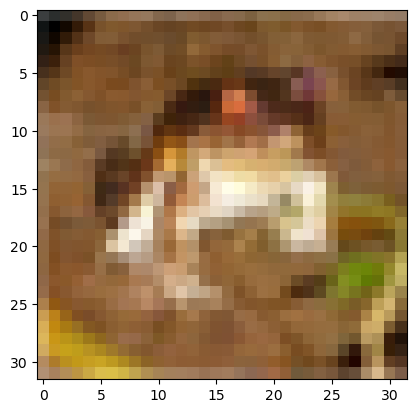

In [12]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0],cmap='gray')

In [13]:
train_y[0]

array([6], dtype=uint8)

In [14]:
# Normalize the data
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

In [15]:
train_x.shape[2:]

(32, 3)

## Build the model

In [16]:
model = Sequential()

#CONV -> RELU -> CONV -> RELU -> POOL -> DROPOUT
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3))) # 32 convolutional filters that are 3x3 in size.
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # Does max pooling in 2x2 box, reduces the size by half.
model.add(Dropout(0.25)) # Once we are done, we drop 25% of our neurons.

#CONV -> RELU -> CONV -> RELU -> POOL -> DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3))) # Similar to above, but now we do 64 filters.
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Once we are done, we drop 25% of the neurons.

#FLATTEN -> DENSE -> RELU -> DROPOUT -> DENSE -> SOFTMAX
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [17]:
# We can look at the summary. The learning is happening when there are values in param #.
# So, we have 4 layers of convolution followed by 2 dense layers. In total, 6 layers.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [18]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(train_x, train_y, epochs=25, validation_split=0.2, verbose=2)

Epoch 1/25
1250/1250 - 99s - loss: 1.6043 - accuracy: 0.4090 - val_loss: 1.2686 - val_accuracy: 0.5383 - 99s/epoch - 79ms/step
Epoch 2/25
1250/1250 - 95s - loss: 1.2196 - accuracy: 0.5631 - val_loss: 1.0150 - val_accuracy: 0.6429 - 95s/epoch - 76ms/step
Epoch 3/25
1250/1250 - 94s - loss: 1.0484 - accuracy: 0.6291 - val_loss: 0.9041 - val_accuracy: 0.6868 - 94s/epoch - 75ms/step
Epoch 4/25
1250/1250 - 94s - loss: 0.9449 - accuracy: 0.6669 - val_loss: 0.8477 - val_accuracy: 0.7081 - 94s/epoch - 75ms/step
Epoch 5/25
1250/1250 - 95s - loss: 0.8687 - accuracy: 0.6962 - val_loss: 0.8033 - val_accuracy: 0.7177 - 95s/epoch - 76ms/step
Epoch 6/25
1250/1250 - 94s - loss: 0.8177 - accuracy: 0.7146 - val_loss: 0.7624 - val_accuracy: 0.7407 - 94s/epoch - 75ms/step
Epoch 7/25
1250/1250 - 98s - loss: 0.7703 - accuracy: 0.7292 - val_loss: 0.7612 - val_accuracy: 0.7343 - 98s/epoch - 79ms/step
Epoch 8/25
1250/1250 - 93s - loss: 0.7351 - accuracy: 0.7414 - val_loss: 0.7202 - val_accuracy: 0.7522 - 93s/ep

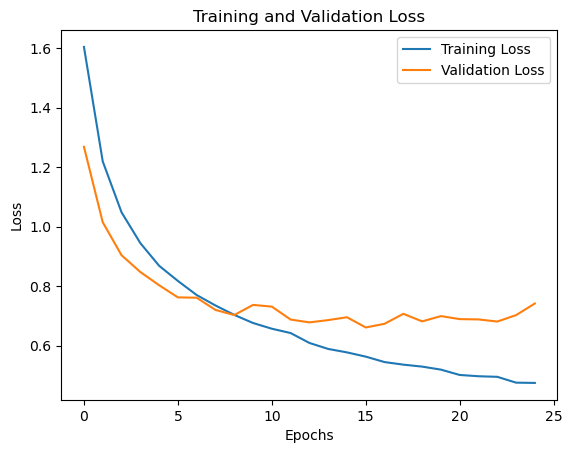

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

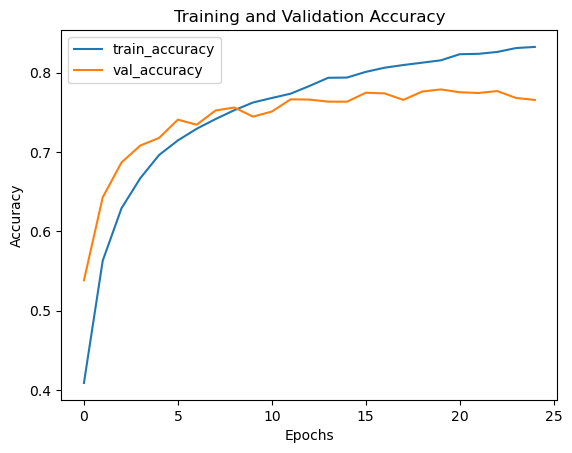

In [21]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(test_x,  test_y, verbose=2)

313/313 - 3s - loss: 0.7588 - accuracy: 0.7628 - 3s/epoch - 11ms/step
